In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [7]:
train = pd.read_csv('C:\\Users\\guilh_000\\Documents\\tweetclassificador\\prttrain.csv')

print(train.shape)

(5670, 8)


In [12]:
pd.options.display.max_colwidth = 100
train.tail()

,text,hatespeech_comb,hatespeech_G1,annotator_G1,hatespeech_G2,annotator_G2,hatespeech_G3,annotator_G3
5665,@zecarlosantos2 é o unico que nao se corrompe..nao se vende.. e quando chega no aroporto é aplau...,0,1,C,0.0,B,0,A
5666,"@zqkitowz sei das cotas, mas não sabia disso, putaria da porra",1,1,D,1.0,It,0,A
5667,"@zqkitowz sim, a maioria do eleitorado é mulher, 51%",0,0,C,0.0,V,0,C
5668,"@zurcju seguir no tt é facíl, apresentar as amigas sapatão ngm quer kkkkkk",1,1,C,1.0,S,0,A
5669,na vdd a culpa é do menino de 11 anos otário que me chamava de burra/gorda/feia todo santo dia q...,1,1,E,1.0,It,0,D


In [16]:
print('Tamanho da base: ', train.shape[0])
train['hatespeech_comb'].value_counts()

Tamanho da base:  5670


0    3882
1    1788
Name: hatespeech_comb, dtype: int64

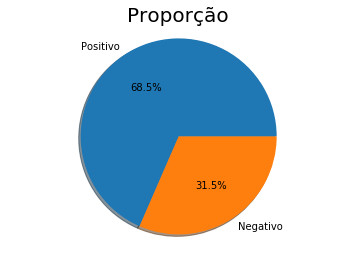

In [17]:
labels = ['Positivo', 'Negativo']
sizes = [train['hatespeech_comb'].value_counts()[0],
         train['hatespeech_comb'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Proporção', fontsize=20)
plt.show()

In [22]:
## pre-processing
import string
import nltk
from nltk.corpus import stopwords
import re

lista_stop = stopwords.words('portuguese')
lista_stop

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [23]:
lista_stop.append('tipo')
lista_stop.append('tudo')
lista_stop.append('tão')
lista_stop.append('vai')

In [148]:
from unidecode import unidecode

def stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

def normalizar(tweet):
    punct = list(string.punctuation)
    additional_stop_words = ['RT','rt','via','...','http','twitpic','tinyurl','www', 'amp']
    stopword_list = punct + lista_stop + additional_stop_words
    
    tweet = re.sub("á",  "a", tweet)           # Replace pattern # -> ' '
    tweet = re.sub("ã",  "a", tweet)
    tweet = re.sub("é",  "e", tweet)
    tweet = re.sub("í",  "i", tweet)
    tweet = re.sub("ó",  "o", tweet)
    tweet = re.sub("ú",  "u", tweet)
    tweet = re.sub("(@[A-Za-z0-9]+)", " ", tweet)
    tweet_ = re.sub("(\w+:\/\/\S+)", " ", tweet)
    tweet__ = re.sub("[^a-zA-Z]", " ", tweet_)
    #tweet___ = unidecode(tweet__)
    ###stem = stemming(tweet__)
    #tokens = nltk.word_tokenize(lemmatized)[2:]
    tokens = nltk.word_tokenize(tweet__)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stopword_list, lower_case))
    return filtered_result

In [149]:
train['normalizado'] = train.text.apply(normalizar)
train.tail()

,text,hatespeech_comb,hatespeech_G1,annotator_G1,hatespeech_G2,annotator_G2,hatespeech_G3,annotator_G3,normalizado,normal
5665,@zecarlosantos2 é o unico que nao se corrompe..nao se vende.. e quando chega no aroporto é aplau...,0,1,C,0.0,B,0,A,"[unico, nao, corrompe, nao, vende, chega, aroporto, aplaudido, nao, vaiado]",unico nao corrompe nao vende chega aroporto aplaudido nao vaiado
5666,"@zqkitowz sei das cotas, mas não sabia disso, putaria da porra",1,1,D,1.0,It,0,A,"[cotas, nao, sabia, disso, putaria, porra]",cotas nao sabia disso putaria porra
5667,"@zqkitowz sim, a maioria do eleitorado é mulher, 51%",0,0,C,0.0,V,0,C,"[maioria, eleitorado, mulher]",maioria eleitorado mulher
5668,"@zurcju seguir no tt é facíl, apresentar as amigas sapatão ngm quer kkkkkk",1,1,C,1.0,S,0,A,"[tt, facil, apresentar, amigas, sapatao, ngm, quer, kkkkkk]",tt facil apresentar amigas sapatao ngm quer kkkkkk
5669,na vdd a culpa é do menino de 11 anos otário que me chamava de burra/gorda/feia todo santo dia q...,1,1,E,1.0,It,0,D,"[culpa, menino, anos, otario, chamava, burra, gorda, feia, todo, santo, dia, tava, quinta, serie]",culpa menino anos otario chamava burra gorda feia todo santo dia tava quinta serie


In [150]:
train['normal'] = [' '.join(map(str, l)) for l in train['normalizado']]
train.tail()

,text,hatespeech_comb,hatespeech_G1,annotator_G1,hatespeech_G2,annotator_G2,hatespeech_G3,annotator_G3,normalizado,normal
5665,@zecarlosantos2 é o unico que nao se corrompe..nao se vende.. e quando chega no aroporto é aplau...,0,1,C,0.0,B,0,A,"[unico, nao, corrompe, nao, vende, chega, aroporto, aplaudido, nao, vaiado]",unico nao corrompe nao vende chega aroporto aplaudido nao vaiado
5666,"@zqkitowz sei das cotas, mas não sabia disso, putaria da porra",1,1,D,1.0,It,0,A,"[cotas, nao, sabia, disso, putaria, porra]",cotas nao sabia disso putaria porra
5667,"@zqkitowz sim, a maioria do eleitorado é mulher, 51%",0,0,C,0.0,V,0,C,"[maioria, eleitorado, mulher]",maioria eleitorado mulher
5668,"@zurcju seguir no tt é facíl, apresentar as amigas sapatão ngm quer kkkkkk",1,1,C,1.0,S,0,A,"[tt, facil, apresentar, amigas, sapatao, ngm, quer, kkkkkk]",tt facil apresentar amigas sapatao ngm quer kkkkkk
5669,na vdd a culpa é do menino de 11 anos otário que me chamava de burra/gorda/feia todo santo dia q...,1,1,E,1.0,It,0,D,"[culpa, menino, anos, otario, chamava, burra, gorda, feia, todo, santo, dia, tava, quinta, serie]",culpa menino anos otario chamava burra gorda feia todo santo dia tava quinta serie


In [151]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer  

count_vectorizer = CountVectorizer(ngram_range=(1,2))
vectorized_data =count_vectorizer.fit_transform(train['normal'])

#tfidfconverter = TfidfTransformer()  
#tfid_data = tfidfconverter.fit_transform(vectorized_data)

#indexed_data =hstack((np.array(range(0,tfid_data.shape[0]))[:,None],tfid_data))

#vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
#final_features = vectorizer.fit_transform(train['normal'])
#final_features.shape

indexed_data =hstack((np.array(range(0,vectorized_data.shape[0]))[:,None],vectorized_data))
vectorized_data.shape

(5670, 43931)

In [152]:
targets = train.iloc[:, 1]

from sklearn.model_selection import train_test_split 
data_train, data_test, targets_train, targets_test =train_test_split(indexed_data, targets, test_size=0.2,random_state=100)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [153]:
#############################################################################################################
from sklearn.naive_bayes import MultinomialNB
nbc = MultinomialNB(fit_prior=True, alpha=1.0).fit(data_train, targets_train)

In [154]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

nb_pred = nbc.predict(data_test)

print(confusion_matrix(targets_test, nb_pred))
print(classification_report(targets_test,nb_pred))
print(accuracy_score(targets_test, nb_pred))

[[543 238]
 [151 202]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       781
           1       0.46      0.57      0.51       353

    accuracy                           0.66      1134
   macro avg       0.62      0.63      0.62      1134
weighted avg       0.68      0.66      0.67      1134

0.6569664902998237


In [155]:
#CHECK BEST PARAMETERS ONLY RUN IF FAST GPU

from sklearn.model_selection import GridSearchCV
hiperparameters = {'alpha': (1.0,1.5,2.0,2.5,3.0),'fit_prior':[True, False]}
grid = GridSearchCV(MultinomialNB(), hiperparameters, cv=3)
grid.fit(data_train, targets_train)

print(grid.best_params_)
print(grid.best_score_)

{'alpha': 3.0, 'fit_prior': True}
0.7270723104056437


In [156]:
nbm = MultinomialNB(fit_prior=True, alpha=3.0).fit(data_train, targets_train)

In [157]:
nbm_pred = nbm.predict(data_test)

print(confusion_matrix(targets_test, nbm_pred))
print(classification_report(targets_test,nbm_pred))
print(accuracy_score(targets_test, nbm_pred))

[[709  72]
 [234 119]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       781
           1       0.62      0.34      0.44       353

    accuracy                           0.73      1134
   macro avg       0.69      0.62      0.63      1134
weighted avg       0.71      0.73      0.70      1134

0.7301587301587301


In [173]:
tweet = ['saia da minha frente']
x = count_vectorizer.transform(tweet)
result = nbc.predict(x)
if(result==0):
    print('Positivo')
else:
    print('Negativo')

ValueError: dimension mismatch

In [94]:
###################################################
isnegative = train[train.hatespeech_comb == 1]
print(isnegative.shape)

(1788, 10)


In [95]:
allnegative = isnegative['normal']
allnegative.head()

0     cara vive outro mundo nao mundo real refugiados sao vivem favelas vizinhas fortalezas
4                                                                    dia macaco branco haha
17                                                     pra mao jovem amante pra mao cappice
18                                                                   foda sera profissional
19                                                                         dia sapatao vida
Name: normal, dtype: object

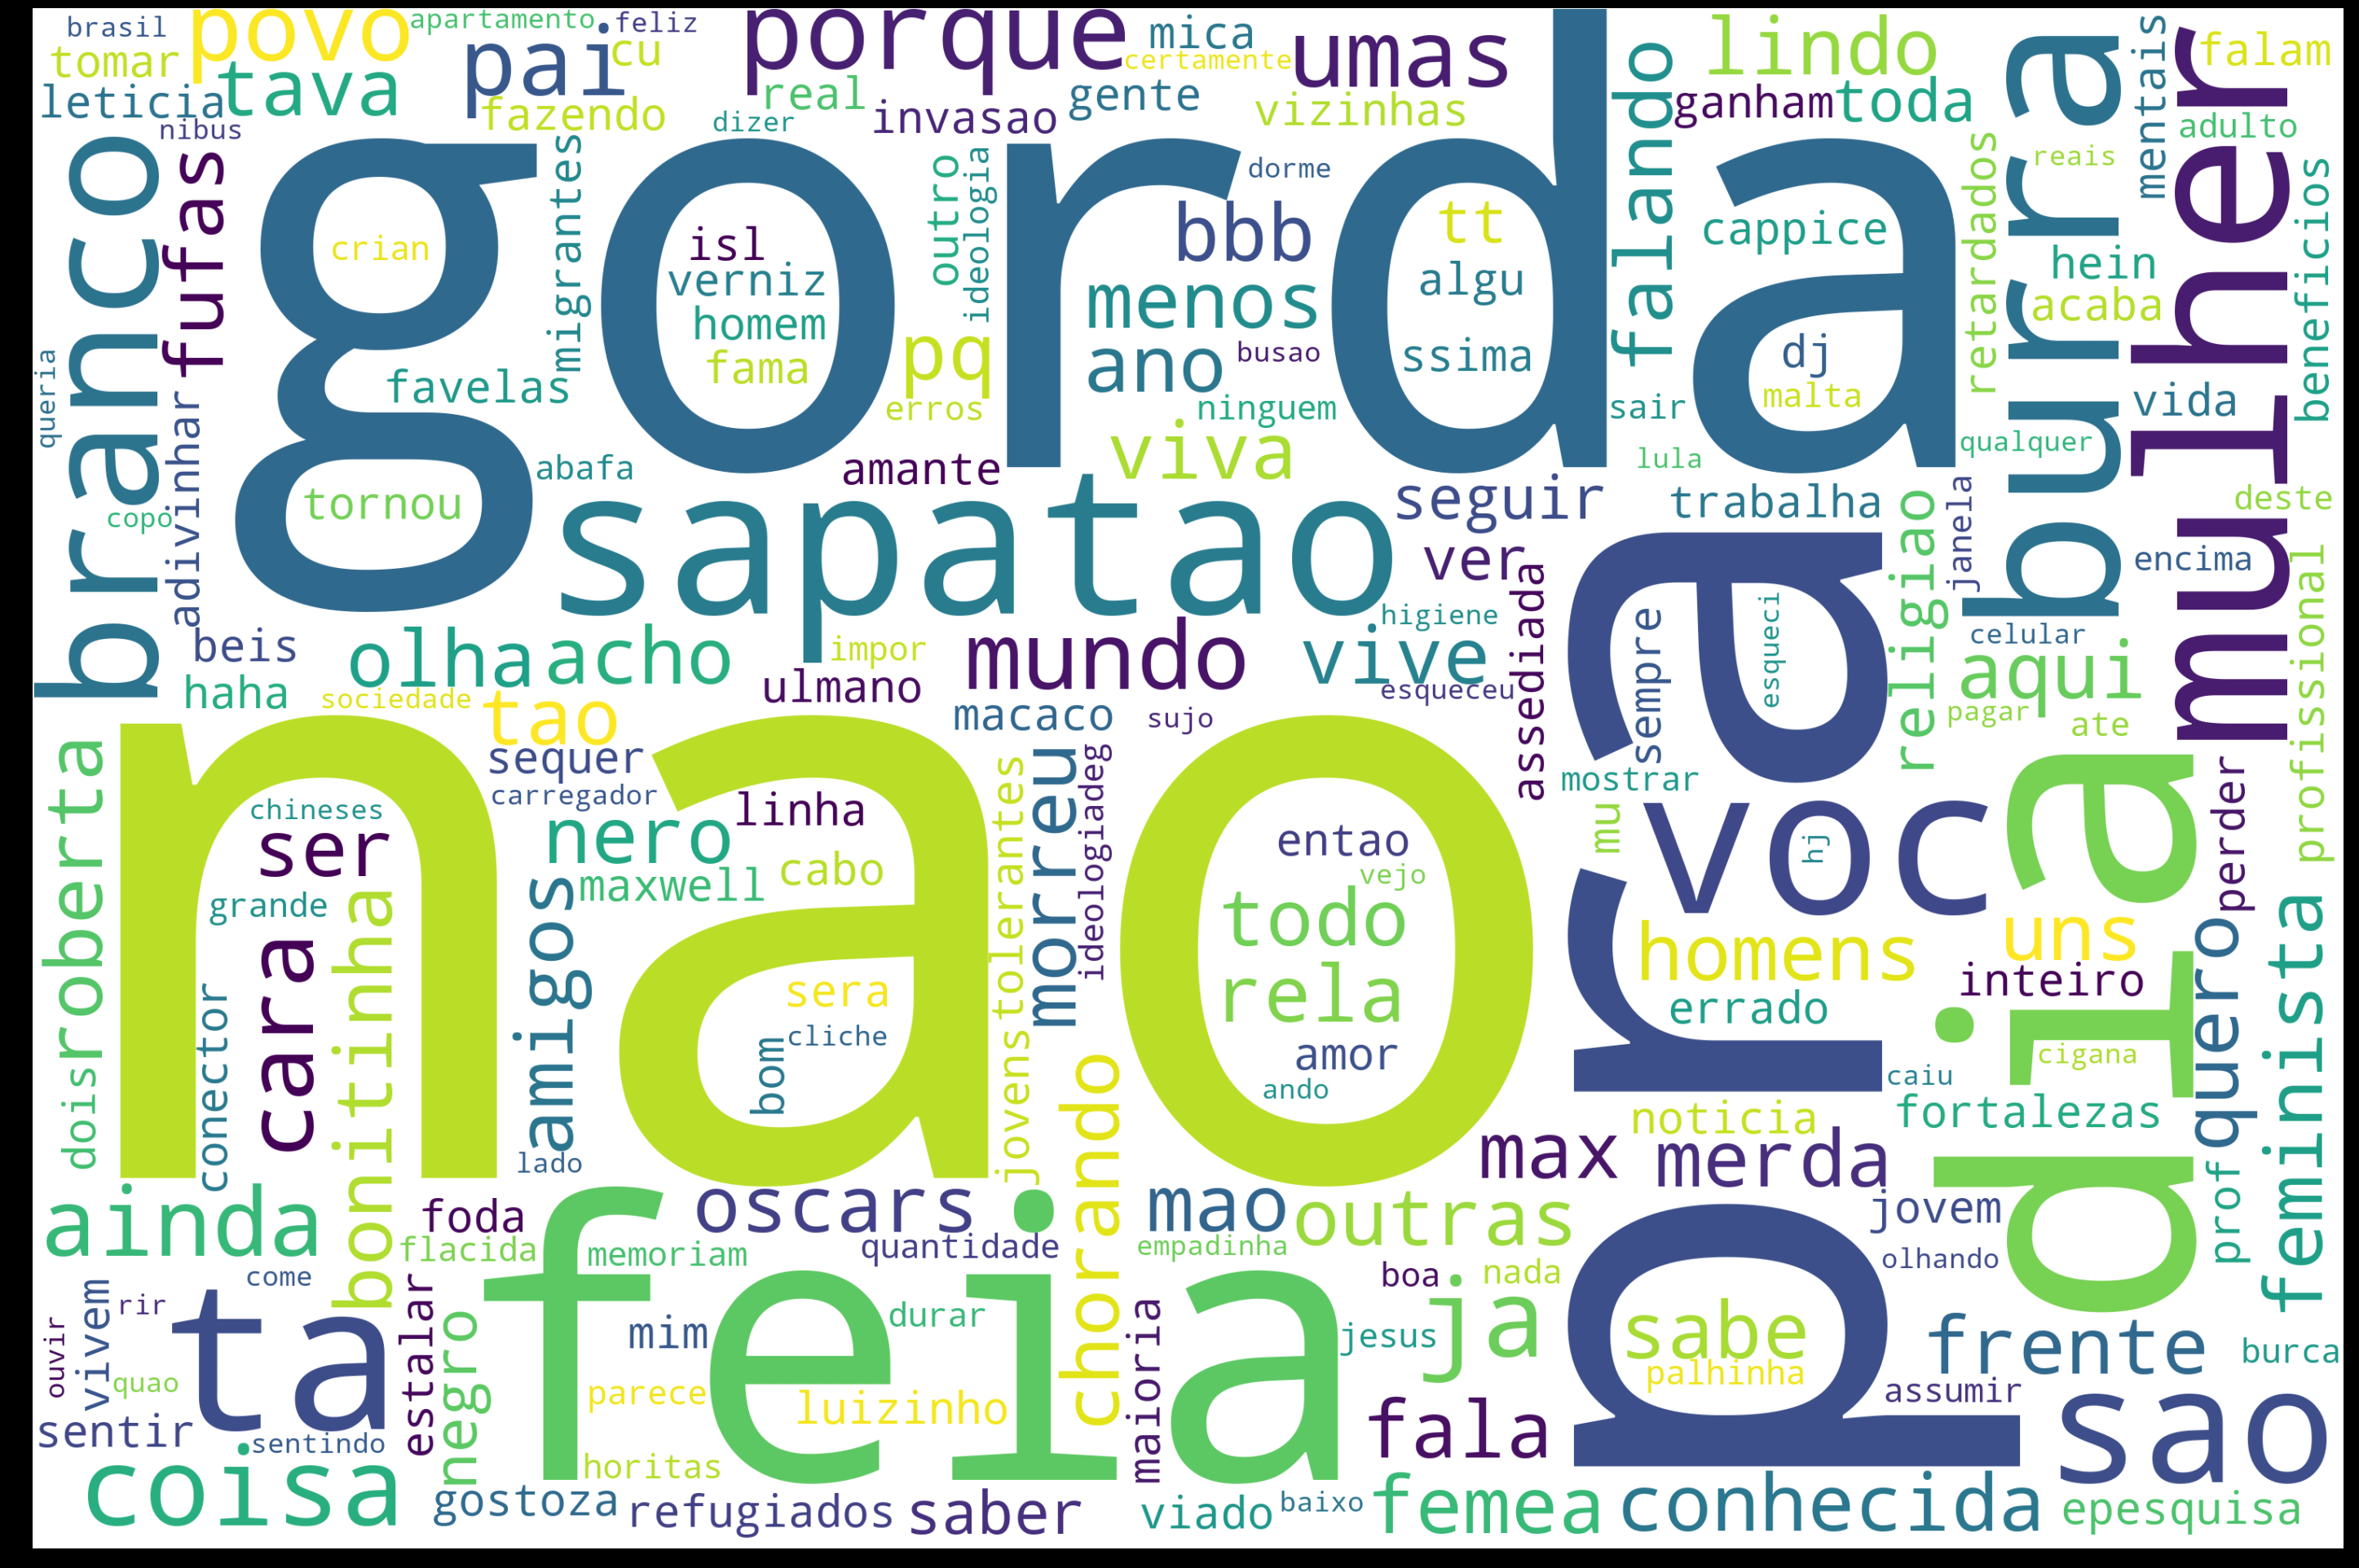

In [96]:
#build negativr wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm

text = isnegative.normal
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()